In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import logging  
warnings.filterwarnings("ignore")

## Logging

In [12]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s | %(levelname)s | %(message)s',
    handlers=[
        logging.FileHandler("duplicate_video_checker.log"),
        logging.StreamHandler()
    ]
)

## Data Analysis

In [3]:
def count_folders_listdir(directory_path):
    folder_count = 0
    try:
        for item in os.listdir(directory_path):
            item_path = os.path.join(directory_path, item)
            if os.path.isfile(item_path):
                folder_count += 1
    except FileNotFoundError:
        print(f"Error: Directory '{directory_path}' not found.")
    return folder_count

# Example usage:
realPath = "/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/03_Semester/DL/archive/data/Celeb-real"  
fakepath = "/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/03_Semester/DL/archive/data/Celeb-synthesis"
real = count_folders_listdir(realPath)
fake = count_folders_listdir(fakepath)
print(f"Number of folders in real folder: {real}")
print(f"Number of folders in fake folder: {fake}")

Number of folders in real folder: 890
Number of folders in fake folder: 5639


## Target Distribution

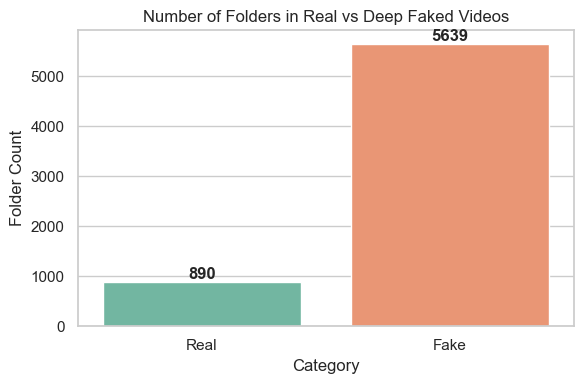

In [9]:
df = pd.DataFrame({
    "Category": ["Real", "Fake"],
    "Folder Count": [real, fake]
})


# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x="Category", y="Folder Count", palette="Set2")
plt.title("Number of Folders in Real vs Deep Faked Videos")
plt.ylabel("Folder Count")
plt.xlabel("Category")
for i, count in enumerate(df["Folder Count"]):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## 